In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = load_digits()

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df.shape

(1797, 64)

In [7]:
X = df
y = data.target

## DecisionTree

In [8]:
decision_tree = DecisionTreeClassifier(random_state=42)
cross_score = cross_val_score(decision_tree, X, y, cv=10)
decision_tree_accuracy = cross_score.mean()
decision_tree_accuracy

0.8335909373060211

## Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier

In [9]:
bag_clf = BaggingClassifier(decision_tree, n_estimators=100, random_state=42, n_jobs=-1)
cross_score_bag = cross_val_score(bag_clf, X, y, cv=10)
cross_score_bag.mean()

0.9270732464307884

## Bagging with parametrs

In [10]:
%%time
sqrt_len_features = int(np.sqrt(len(X.columns)))
bag_clf_1 = BaggingClassifier(decision_tree, n_estimators=100, max_features=sqrt_len_features, n_jobs=-1, random_state=42)
cross_score_bag_1 = cross_val_score(bag_clf_1, X, y, cv=10)
cross_score_bag_1.mean()

Wall time: 2.09 s


0.9298851644941031

## Bagging_3

In [11]:
%%time
bag_clf_2 = BaggingClassifier(DecisionTreeClassifier(max_features=sqrt_len_features), n_estimators=100, n_jobs=-1, random_state=42)
cross_score_bag_2 = cross_val_score(bag_clf_2, X, y, cv=10)
cross_score_bag_2.mean()

Wall time: 1.77 s


0.9549224084419615

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
%%time
rnd_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
cross_score_rnd = cross_val_score(rnd_clf, X, y, cv=10)
cross_score_rnd.mean()

Wall time: 2.91 s


0.9493544382371197

In [14]:
%%time
trees = np.arange(100, 1000, 100)
for tree in trees:
    rnd_clf = RandomForestClassifier(random_state=42, n_estimators=tree, n_jobs=-1)
    cross_score_rnd = cross_val_score(rnd_clf, X, y, cv=10)
    print(tree, ':', cross_score_rnd.mean())

100 : 0.9493544382371197
200 : 0.951024208566108
300 : 0.9526970825574177
400 : 0.951576660459342
500 : 0.9510211049037863
600 : 0.9499130974549969
700 : 0.9499130974549969
800 : 0.9499099937926753
900 : 0.9499162011173183
Wall time: 1min 14s


In [15]:
trees = np.arange(5, 20, 5)
for tree in trees:
    rnd_clf = RandomForestClassifier(random_state=42, n_estimators=tree, n_jobs=-1)
    cross_score_rnd = cross_val_score(rnd_clf, X, y, cv=10)
    print(tree, ':', cross_score_rnd.mean())

5 : 0.8787088764742397
10 : 0.9154127870887647
15 : 0.9326722532588454


***С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.***

***При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев***

In [16]:
features = np.array([5, 10, 40, 50])
for feature in features:
    rnd_clf = RandomForestClassifier(random_state=42, max_features=feature, n_jobs=-1)
    cross_score_rnd = cross_val_score(rnd_clf, X, y, cv=10)
    print(feature, ':', cross_score_rnd.mean())

5 : 0.9515890751086282
10 : 0.948792675356921
40 : 0.940983860955928
50 : 0.9331998758535069


***При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.***

In [17]:
max_depth = np.array([None, 5,6])
for depth in max_depth:
    rnd_clf = RandomForestClassifier(random_state=42, max_depth=depth, n_jobs=-1)
    cross_score_rnd = cross_val_score(rnd_clf, X, y, cv=10)
    print(depth, ':', cross_score_rnd.mean())

None : 0.9493544382371197
5 : 0.9042613283674736
6 : 0.9248541278708877


***При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).***

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

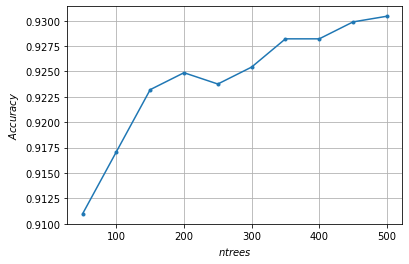

Wall time: 6min 47s


In [50]:
%%time
scoring = []
trees_grid = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for ntrees in trees_grid:
    est = GradientBoostingClassifier(n_estimators=ntrees, max_depth=3, random_state=42)
    cross = cross_val_score(est, X, y, cv=3)
    scoring.append(cross.mean())

plt.plot(trees_grid, scoring, marker='.') # Построение графика
plt.xlabel('$ntrees$') # Метка по оси x в формате TeX
plt.ylabel('$Accuracy$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.show() # Показать график

In [54]:
print("GradientBoosting, Accuracy:", scoring[-1])

GradientBoosting, Accuracy: 0.9304396215915415


# Random Forest - лучшая модель. Accuracy = 0.945